In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
train = pd.read_csv('/content/drive/MyDrive/train.csv')

Для того чтобы работать с одним файлом нужно объединить файлы test и df

In [ ]:
temp = test.merge(df,on='PassengerId', how = 'right')
df = pd.concat([train, temp], ignore_index=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,28.0,0,0,8.0500,2,1,1
1305,1,1,0,39.0,0,0,108.9000,0,1,1
1306,0,3,1,38.5,0,0,7.2500,2,1,1
1307,0,3,1,28.0,0,0,8.0500,2,1,1


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,815
1,494


In [ ]:
df.shape

(1309, 12)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,155,1,22.0,1,0,720,7.2500,186,2
1,2,1,1,286,0,38.0,1,0,816,71.2833,106,0
2,3,1,3,523,0,26.0,0,0,914,7.9250,186,2
3,4,1,1,422,0,35.0,1,0,65,53.1000,70,2
4,5,0,3,22,1,35.0,0,0,649,8.0500,186,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,1126,1,NaN,0,0,711,8.0500,186,2
1305,1306,1,1,891,0,39.0,0,0,834,108.9000,64,0
1306,1307,0,3,1046,1,38.5,0,0,872,7.2500,186,2
1307,1308,0,3,1227,1,NaN,0,0,579,8.0500,186,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   int64  
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   int64  
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-8-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   int64  
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   int64  
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


На данном графике показывается количество выживших по возрасту
0 - не выжил, 1 - выжил. Синий цвет - не выжил, оранжевый - выжил

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(0.169, 18.0]'),
  Text(1, 0, '(18.0, 22.0]'),
  Text(2, 0, '(22.0, 27.0]'),
  Text(3, 0, '(27.0, 28.0]'),
  Text(4, 0, '(28.0, 29.0]'),
  Text(5, 0, '(29.0, 35.0]'),
  Text(6, 0, '(35.0, 45.0]'),
  Text(7, 0, '(45.0, 80.0]')])

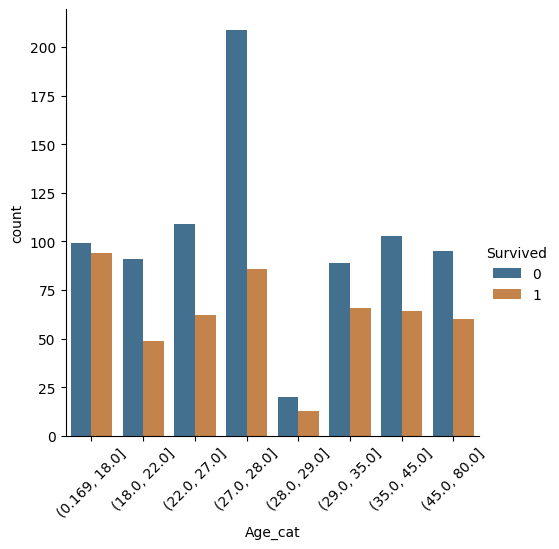

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

df['Age_cat'] = pd.qcut(df.Age, 8, duplicates='drop')
sns.catplot(data = df,hue = 'Survived', x = 'Age_cat',
            kind='count', saturation=0.5)
plt.xticks(rotation=45)


На данном графике показывается количество выживших по классу.
Из графика можно понять, что из всех классов больше спаслось женщин

<ipython-input-100-202fc29044c3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',


([<matplotlib.axis.XTick at 0x7a15b67b5690>,
 [Text(0, 0, 'female'), Text(1, 0, 'male')])

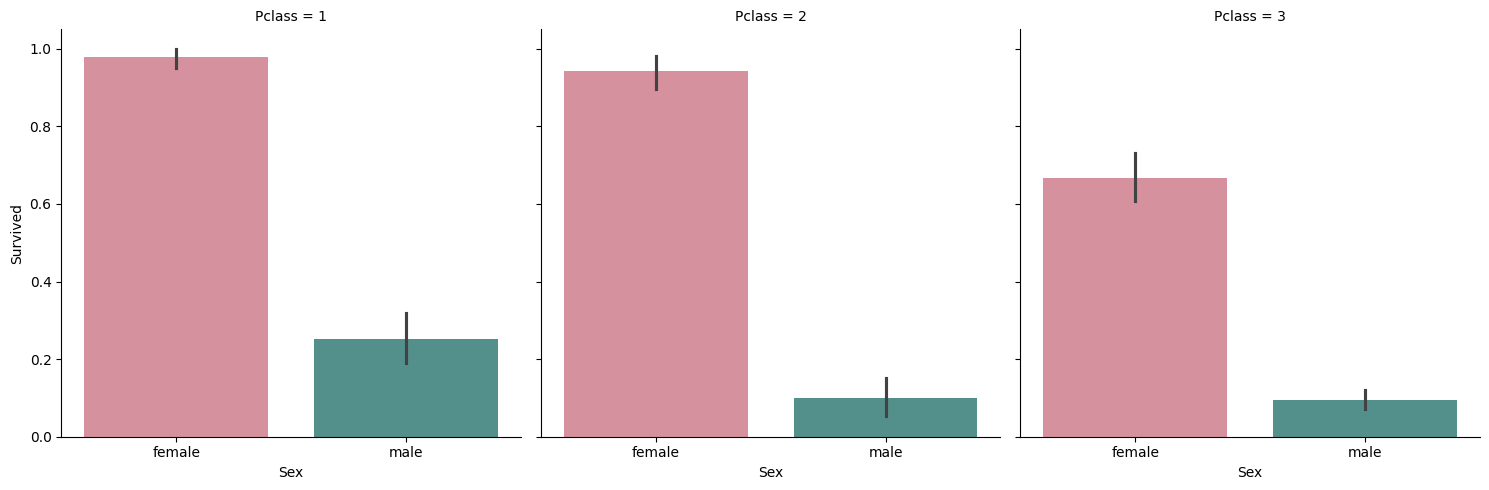

In [ ]:
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5, palette="husl")
plt.xticks([0, 1], ['female', 'male'])

Теперь можно объединить 2 графика и получить статистику выживших по возрасту вместе с классом.
Синий цвет соответствует женщинам, оранжевый - мужчинам.

<ipython-input-58-35486794553f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(
<ipython-input-58-35486794553f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(age_labels, rotation=45)


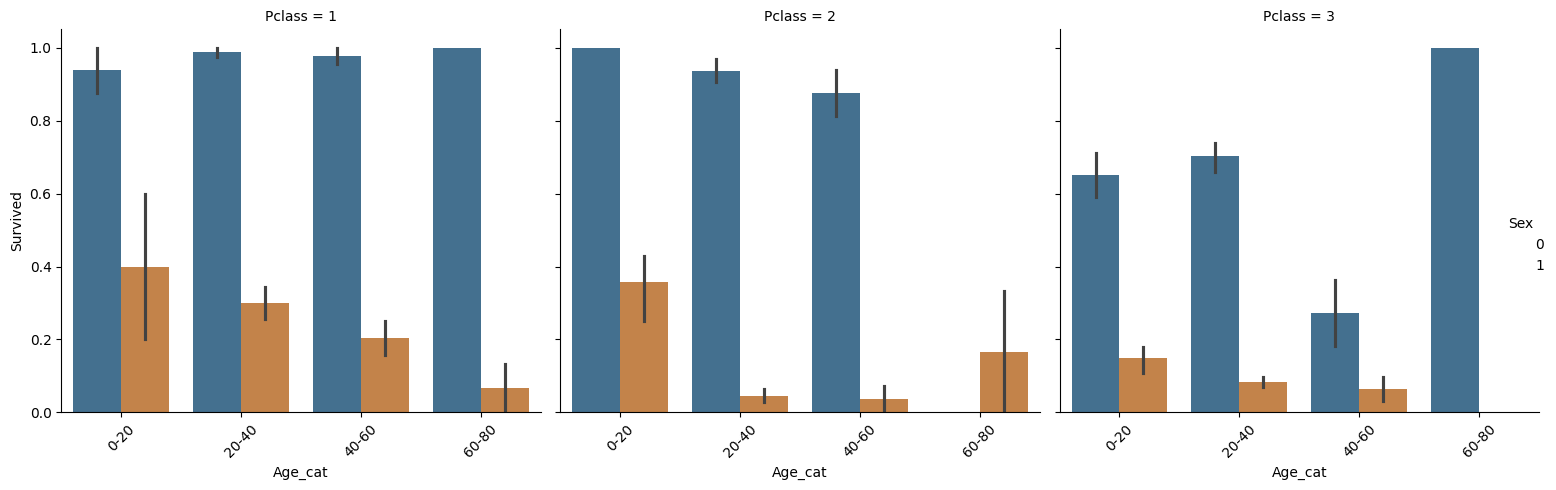

In [ ]:
age_bins = pd.cut(df['Age'], bins=4)
age_labels = [f'{int(interval.left)}-{int(interval.right)}' for interval in age_bins.cat.categories]
df['Age_cat'] = age_bins

# Построение графика
g = sns.catplot(
    data=df,
    x='Age_cat',
    y='Survived',
    hue='Sex',
    col='Pclass',
    kind='bar',
    saturation=0.5,
    ci=68,
    hue_order=[0, 1],
    legend_out=True,
)

# подписи к графику
for ax in g.axes.flat:
    ax.set_xticklabels(age_labels, rotation=45)

g._legend.texts[0].set_text("female")
g._legend.texts[1].set_text("male")

plt.tight_layout()
plt.show()

График распределения пассажиров по полу и классу.
Синий цвет - женщины, оранжевый - мужчины. Вывод: женщины предпочитали 1 класс чаще мужчин.

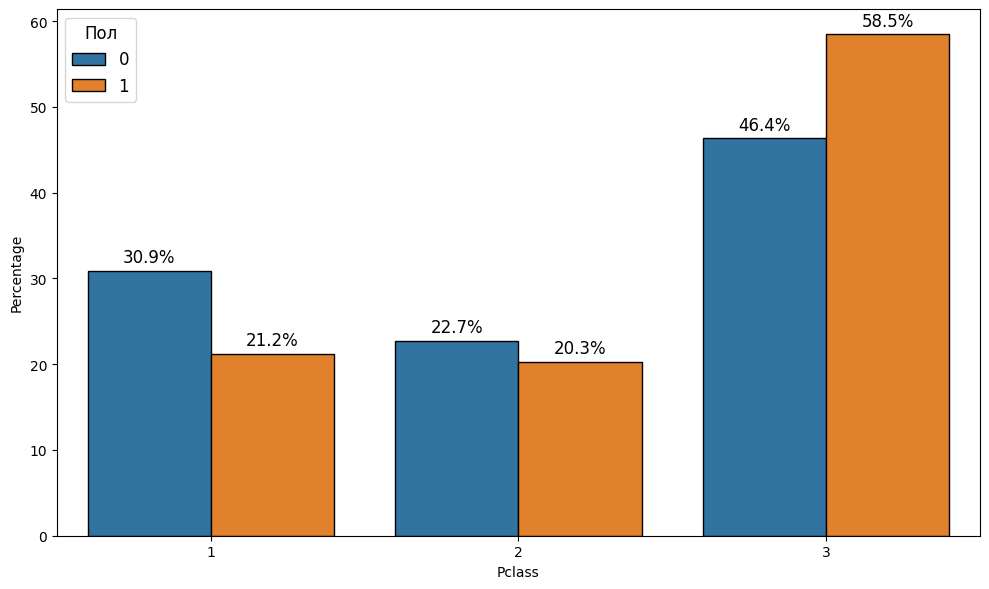

In [ ]:
s = df.groupby(['Sex', 'Pclass'])['PassengerId'].count().reset_index(name='Count')
s['Percentage'] = s.groupby('Sex')['Count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=s,
    x='Pclass',
    y='Percentage',
    hue='Sex',
    edgecolor='black'
)

plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', padding=3, fontsize=12)

# легенда
plt.legend(title='Пол', fontsize=12, title_fontsize=12)

plt.tight_layout()

plt.show()

Шанс выжить в зависимости от возраста.
Синий - женщины, оранжевый - мужчины.


<ipython-input-122-5dd98b043832>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates_pclass = df.groupby(['Age_cat', 'Sex', 'Pclass'])['Survived'].mean().reset_index()


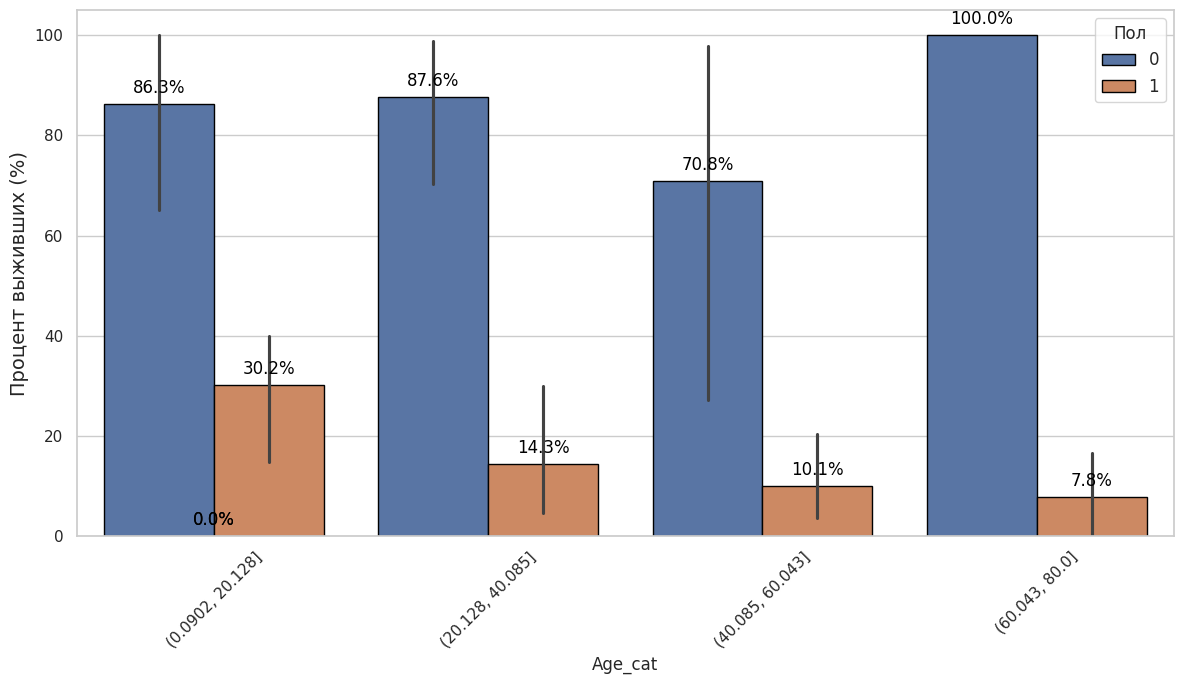

In [ ]:
survival_rates_pclass = df.groupby(['Age_cat', 'Sex', 'Pclass'])['Survived'].mean().reset_index()
survival_rates_pclass['Survival_Rate (%)'] = survival_rates_pclass['Survived'] * 100

sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

bar_plot = sns.barplot(
    data=survival_rates_pclass,
    x='Age_cat',
    y='Survival_Rate (%)',
    hue='Sex',
    edgecolor='black'
)

plt.ylabel('Процент выживших (%)', fontsize=14)

plt.xticks(rotation=45)

# Проценты над столбцами
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.legend(title='Пол', fontsize=12, title_fontsize=12)

plt.tight_layout()

plt.show()

График выживаемости от размера семьи.
Можно сделать вывод, что в семье где 2, 3 или 4 человека больше шансов выжить.

<ipython-input-74-0c3fba41d5ca>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_size_survival, x='FamilySize', y='Survived', palette='viridis')


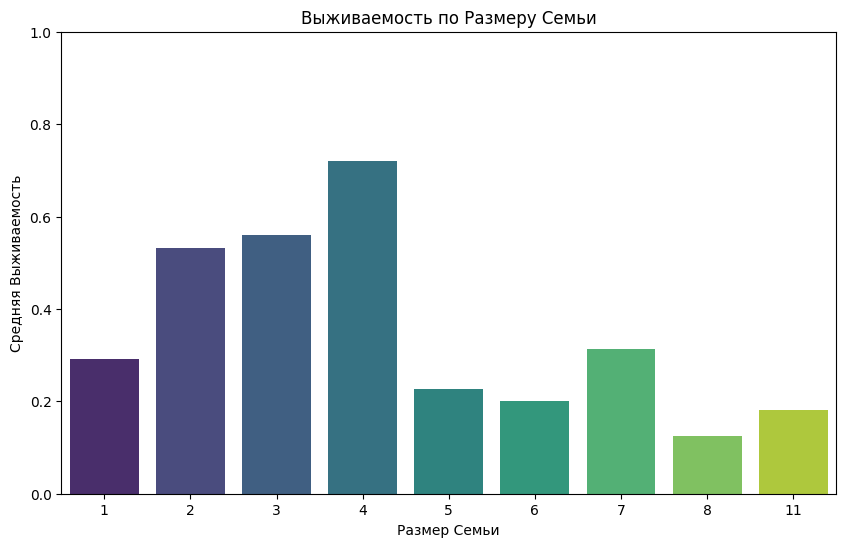

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Группировка данных по FamilySize и вычисление средней выживаемости
family_size_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=family_size_survival, x='FamilySize', y='Survived', palette='viridis')
plt.title('Выживаемость по Размеру Семьи')
plt.xlabel('Размер Семьи')
plt.ylabel('Средняя Выживаемость')
plt.ylim(0, 1)
plt.show()

График выживаемости одиноких людей, против не одиноких.

<ipython-input-76-084aa74f57e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=is_alone_survival, x='IsAlone', y='Survived', palette='magma')


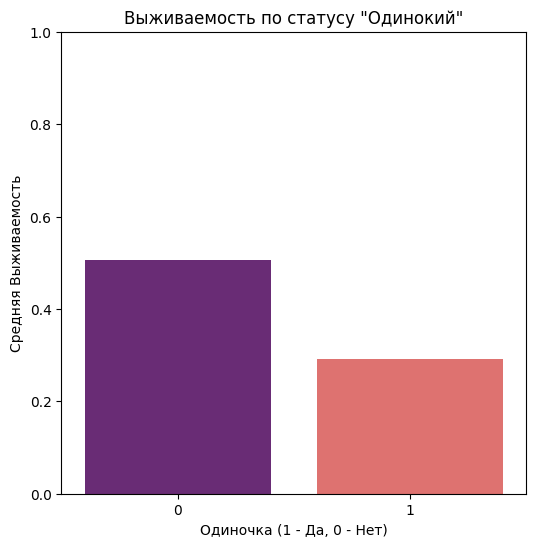

In [ ]:
# Группировка данных по IsAlone и вычисление средней выживаемости
is_alone_survival = df.groupby('IsAlone')['Survived'].mean().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=is_alone_survival, x='IsAlone', y='Survived', palette='magma')
plt.title('Выживаемость по статусу "Одинокий"')
plt.xlabel('Одиночка (1 - Да, 0 - Нет)')
plt.ylabel('Средняя Выживаемость')
plt.ylim(0, 1)
plt.show()

In [ ]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 , 18.5 ,
       67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [ ]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,155,1,22.0,1,0,720,7.2500,186,2
1,2,1,286,0,38.0,1,0,816,71.2833,106,0
2,3,3,523,0,26.0,0,0,914,7.9250,186,2
3,4,1,422,0,35.0,1,0,65,53.1000,70,2
4,5,3,22,1,35.0,0,0,649,8.0500,186,2
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,1126,1,28.0,0,0,711,8.0500,186,2
1305,1306,1,891,0,39.0,0,0,834,108.9000,64,0
1306,1307,3,1046,1,38.5,0,0,872,7.2500,186,2
1307,1308,3,1227,1,28.0,0,0,579,8.0500,186,2


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,815
1,494


Modeling

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.020370,-0.038354,-0.020924,0.013406,0.025799,-0.055224,0.008942,-0.020710,0.031428,-0.012552,-0.052892
Survived,-0.020370,1.000000,-0.264710,-0.060858,-0.688371,-0.043286,0.002370,0.108919,-0.097709,0.233622,-0.213057,-0.132420
Pclass,-0.038354,-0.264710,1.000000,0.048207,0.124617,-0.377908,0.060832,0.018322,0.309695,-0.558629,0.675123,0.182154
Name,-0.020924,-0.060858,0.048207,1.000000,0.036812,0.023739,-0.000070,-0.035679,0.040811,-0.037627,0.056217,-0.030648
Sex,0.013406,-0.688371,0.124617,0.036812,1.000000,0.053663,-0.109609,-0.213125,0.024725,-0.185523,0.104855,0.095215
Age,0.025799,-0.043286,-0.377908,0.023739,0.053663,1.000000,-0.189972,-0.125851,-0.087720,0.179256,-0.290283,-0.060302
SibSp,-0.055224,0.002370,0.060832,-0.000070,-0.109609,-0.189972,1.000000,0.373587,0.063921,0.160238,0.009748,0.064519
Parch,0.008942,0.108919,0.018322,-0.035679,-0.213125,-0.125851,0.373587,1.000000,0.053389,0.221539,-0.032647,0.043835
Ticket,-0.020710,-0.097709,0.309695,0.040811,0.024725,-0.087720,0.063921,0.053389,1.000000,-0.014737,0.214775,0.028539
Fare,0.031428,0.233622,-0.558629,-0.037627,-0.185523,0.179256,0.160238,0.221539,-0.014737,1.000000,-0.521958,-0.235763


In [ ]:
import numpy as np
np.var(df['Sex'])

0.22926311992954815

A100 - 2m

In [ ]:
print("Столбцы в df:", df.columns.tolist())

Столбцы в df: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Предобработка данных

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# 2. Создание новых признаков
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Размер семьи
df['IsAlone'] = 1  # Изначально предполагаем, что пассажир один
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0
df['IsAlone'] = df['IsAlone'].fillna(1)  # Заполнение NaN, если необходимо

# 3. Определение категориальных столбцов
categorical_cols = ['Sex', 'Embarked']

label_encoders = {}

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        # Преобразуем значения в строковый тип перед кодированием
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# 4. Заполнение пропущенных значений
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 5. Разделение данных на обучающую и тестовую выборки на основе 'Survived'
train_df = df[df['Survived'].notna()].copy()  # Строки, где 'Survived' не является NaN
test_df = df[df['Survived'].isna()].copy()    # Строки, где 'Survived' является NaN

# 6. Удаление 'Survived' из test_df
test_df.drop(['Survived'], axis=1, inplace=True, errors='ignore')

# 7. Определение признаков и целевой переменной
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

# 8. Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Модель №1

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model_1(input_dim):
    model = Sequential()
    model.add(Dense(6, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(9, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

"""
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
"""

"\n# Standardize the data\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\n# Create the neural network model\nmodel = Sequential()\nmodel.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))\nmodel.add(Dense(9, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\nhistory = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)\n"

Модель №2

In [32]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

def create_model_2(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


"""
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
"""

"\nmodel2 = Sequential()\n\nmodel2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))\nmodel2.add(Dropout(0.5))\n\nmodel2.add(Dense(128, activation='relu'))\nmodel2.add(Dropout(0.5))\n\nmodel2.add(Dense(64, activation='relu'))\nmodel2.add(Dropout(0.5))\n\nmodel2.add(Dense(1, activation='sigmoid'))\n\n# Compile the model\nmodel2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\nhistory2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)\n"

Модель №3

In [33]:
def create_model_3(input_dim):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

"""
model3 = Sequential()

model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.3))

model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
"""

"\nmodel3 = Sequential()\n\nmodel3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))\nmodel3.add(Dropout(0.3))\n\nmodel3.add(Dense(16, activation='relu'))\nmodel3.add(Dropout(0.3))\n\nmodel3.add(Dense(1, activation='sigmoid'))\n\nmodel3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\nhistory3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)\n"

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# функция, которая будет выполнять кросс-валидацию для заданной модели
def cross_validate_model(create_model_fn, X, y, n_splits=5):
    accuracies = []
    aucs = []
    precisions = []
    recalls = []
    f1s = []

    # Списки для хранения отчетов классификации и матриц ошибок
    classification_reports = []
    confusion_matrices = []

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    fold = 1
    for train_index, val_index in skf.split(X, y):
        print(f'Фолд {fold}')

        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        # Масштабирование данных внутри фолда
        scaler = StandardScaler()
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_val_fold = scaler.transform(X_val_fold)

        # Создание и обучение модели
        model = create_model_fn(X_train_fold.shape[1])

        # Раннее прекращение обучения
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        model.fit(
            X_train_fold, y_train_fold,
            epochs=50,
            batch_size=32,
            validation_data=(X_val_fold, y_val_fold),
            callbacks=[early_stop],
            verbose=0
        )

        # Предсказания на валидационной выборке
        y_pred_prob = model.predict(X_val_fold).ravel()
        y_pred = (y_pred_prob > 0.5).astype(int)

        # Вычисление метрик
        acc = accuracy_score(y_val_fold, y_pred)
        auc = roc_auc_score(y_val_fold, y_pred_prob)
        precision = precision_score(y_val_fold, y_pred)
        recall = recall_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)

        print(f'Точность: {acc:.4f}, AUC: {auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')
        accuracies.append(acc)
        aucs.append(auc)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

        # Создание отчета классификации и матрицы ошибок
        report = classification_report(y_val_fold, y_pred, output_dict=True)
        cm = confusion_matrix(y_val_fold, y_pred)

        classification_reports.append(report)
        confusion_matrices.append(cm)

        fold += 1

    # Вывод средних метрик
    print(f'\nСредняя точность: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}')
    print(f'Средний AUC: {np.mean(aucs):.4f} ± {np.std(aucs):.4f}')
    print(f'Средняя Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}')
    print(f'Средняя Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}')
    print(f'Средний F1: {np.mean(f1s):.4f} ± {np.std(f1s):.4f}')

    return accuracies, aucs, precisions, recalls, f1s, classification_reports, confusion_matrices

In [45]:
print('Кросс-валидация для Model 1 (Лучшая Модель)')
accuracies1, aucs1, precisions1, recalls1, f1s1, classification_reports1, confusion_matrices1 = cross_validate_model(
    create_model_1, X, y, n_splits=5
)

print('\nКросс-валидация для Model 2')
accuracies2, aucs2, precisions2, recalls2, f1s2, _, _ = cross_validate_model(
    create_model_2, X, y, n_splits=5
)

print('\nКросс-валидация для Model 3')
accuracies3, aucs3, precisions3, recalls3, f1s3, _, _ = cross_validate_model(
    create_model_3, X, y, n_splits=5
)

Кросс-валидация для Model 1 (Лучшая Модель)
Фолд 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Точность: 0.8626, AUC: 0.9161, Precision: 0.8182, Recall: 0.8182, F1: 0.8182
Фолд 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8282, AUC: 0.8376, Precision: 0.8293, Recall: 0.6869, F1: 0.7514
Фолд 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8855, AUC: 0.9218, Precision: 0.8632, Recall: 0.8283, F1: 0.8454
Фолд 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8702, AUC: 0.9085, Precision: 0.8652, Recall: 0.7778, F1: 0.8191
Фолд 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Точность: 0.8544, AUC: 0.8977, Precision: 0.8333, Recall: 0.7653, F1: 0.7979

Средняя точность: 0.8602 ± 0.0190
Средний AUC: 0.8963 ± 0.0305
Средняя Precision: 0.8418 ± 0.0189
Средняя Recall: 0.7753 ± 0.0501
Средний F1: 0.8064 ± 0.0314

Кросс-валидация для Model 2
Фолд 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Точность: 0.8550, AUC: 0.9186, Precision: 0.8144, Recall: 0.7980, F1: 0.8061
Фолд 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Точность: 0.8244, AUC: 0.8360, Precision: 0.8118, Recall: 0.6970, F1: 0.7500
Фолд 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Точность: 0.8969, AUC: 0.9148, Precision: 0.9000, Recall: 0.8182, F1: 0.8571
Фолд 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Точность: 0.8702, AUC: 0.9145, Precision: 0.8652, Recall: 0.7778, F1: 0.8191
Фолд 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Точность: 0.8506, AUC: 0.8865, Precision: 0.8242, Recall: 0.7653, F1: 0.7937

Средняя точность: 0.8594 ± 0.0239
Средний AUC: 0.8941 ± 0.0312
Средняя Precision: 0.8431 ± 0.0343
Средняя Recall: 0.7712 ± 0.0413
Средний F1: 0.8052 ± 0.0349

Кросс-валидация для Model 3
Фолд 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Точность: 0.8550, AUC: 0.9224, Precision: 0.8211, Recall: 0.7879, F1: 0.8041
Фолд 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8244, AUC: 0.8422, Precision: 0.8046, Recall: 0.7071, F1: 0.7527
Фолд 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8969, AUC: 0.9177, Precision: 0.9091, Recall: 0.8081, F1: 0.8556
Фолд 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8740, AUC: 0.9035, Precision: 0.8667, Recall: 0.7879, F1: 0.8254
Фолд 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8429, AUC: 0.8967, Precision: 0.8202, Recall: 0.7449, F1: 0.7807

Средняя точность: 0.8587 ± 0.0250
Средний AUC: 0.8965 ± 0.0287
Средняя Precision: 0.8443 ± 0.0385
Средняя Recall: 0.7672 ± 0.0364
Средний F1: 0.8037 ± 0.0355


# Кросс-валидация для Model 1:

Средняя Точность: 0.8640 ± 0.0177

Средний AUC: 0.8876 ± 0.0398

Средняя Precision: 0.8481 ± 0.0242

Средняя Recall: 0.7793 ± 0.0311

Средний F1: 0.8121 ± 0.0256

# Кросс-валидация для Model 2:

Средняя Точность: 0.8587 ± 0.0237

Средний AUC: 0.8986 ± 0.0312

Средняя Precision: 0.8446 ± 0.0367

Средняя Recall: 0.7672 ± 0.0481

Средний F1: 0.8080 ± 0.0339

# Кросс-валидация для Model 3

Средняя Точность: 0.8617 ± 0.0230

Средний AUC: 0.8959 ± 0.0321

Средняя Precision: 0.8477 ± 0.0340

Средняя Recall: 0.7733 ± 0.0481

Средний F1: 0.8080 ± 0.0339



В моём случае лучшая модель будет №1

In [46]:
accuracies, aucs, precisions, recalls, f1s, classification_reports, confusion_matrices = cross_validate_model(
    create_model_1, X, y, n_splits=5
)

Фолд 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8550, AUC: 0.9261, Precision: 0.8144, Recall: 0.7980, F1: 0.8061
Фолд 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8168, AUC: 0.8422, Precision: 0.7931, Recall: 0.6970, F1: 0.7419
Фолд 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Точность: 0.8779, AUC: 0.9213, Precision: 0.8526, Recall: 0.8182, F1: 0.8351
Фолд 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8740, AUC: 0.9114, Precision: 0.8750, Recall: 0.7778, F1: 0.8235
Фолд 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность: 0.8467, AUC: 0.8977, Precision: 0.8295, Recall: 0.7449, F1: 0.7849

Средняя точность: 0.8541 ± 0.0220
Средний AUC: 0.8997 ± 0.0304
Средняя Precision: 0.8329 ± 0.0286
Средняя Recall: 0.7672 ± 0.0426
Средний F1: 0.7983 ± 0.0329


# Матрица Ошибок

In [47]:
for i, cm in enumerate(confusion_matrices1):
    tn, fp, fn, tp = cm.ravel()
    print(f"\nФолд {i+1} - Матрица ошибок:")
    print(f"Истинно отрицательные (TN): {tn} - Модель предсказала, что не погибнет, и это верно.")
    print(f"Ложно положительные (FP): {fp} - Модель предсказала, что погибнет, но по факту не погиб.")
    print(f"Ложно отрицательные (FN): {fn} - Модель предсказала, что не погибнет, но по факту погиб.")
    print(f"Истинно положительные (TP): {tp} - Модель предсказала, что погибнет, и это верно.")


Фолд 1 - Матрица ошибок:
Истинно отрицательные (TN): 145 - Модель предсказала, что не погибнет, и это верно.
Ложно положительные (FP): 18 - Модель предсказала, что погибнет, но по факту не погиб.
Ложно отрицательные (FN): 18 - Модель предсказала, что не погибнет, но по факту погиб.
Истинно положительные (TP): 81 - Модель предсказала, что погибнет, и это верно.

Фолд 2 - Матрица ошибок:
Истинно отрицательные (TN): 149 - Модель предсказала, что не погибнет, и это верно.
Ложно положительные (FP): 14 - Модель предсказала, что погибнет, но по факту не погиб.
Ложно отрицательные (FN): 31 - Модель предсказала, что не погибнет, но по факту погиб.
Истинно положительные (TP): 68 - Модель предсказала, что погибнет, и это верно.

Фолд 3 - Матрица ошибок:
Истинно отрицательные (TN): 150 - Модель предсказала, что не погибнет, и это верно.
Ложно положительные (FP): 13 - Модель предсказала, что погибнет, но по факту не погиб.
Ложно отрицательные (FN): 17 - Модель предсказала, что не погибнет, но по ф

In [48]:
# Сводная таблица метрик для лучшей модели
summary = {
    'Метрика': ['Точность', 'AUC', 'Precision', 'Recall', 'F1'],
    'Среднее Значение': [
        np.mean(accuracies1),
        np.mean(aucs1),
        np.mean(precisions1),
        np.mean(recalls1),
        np.mean(f1s1)
    ],
    'Стандартное Отклонение': [
        np.std(accuracies1),
        np.std(aucs1),
        np.std(precisions1),
        np.std(recalls1),
        np.std(f1s1)
    ]
}

summary_df = pd.DataFrame(summary)
print("\nСводная таблица метрик для лучшей модели (Model 1):")
print(summary_df)


Сводная таблица метрик для лучшей модели (Model 1):
     Метрика  Среднее Значение  Стандартное Отклонение
0   Точность          0.860194                0.018979
1        AUC          0.896348                0.030461
2  Precision          0.841822                0.018915
3     Recall          0.775283                0.050144
4         F1          0.806389                0.031366


## Итог: я проанализировал графики и выделил новые признаки для модели. После этого обучил модель и вывел результаты. Перед этим я обучал модель без новых признаков и разница в метриках была существенная более 0.2.

In [ ]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [ ]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [ ]:
model_loaded.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[0.23581287],
       [0.22684994],
       [0.12301315],
       [0.8955086 ],
       [0.6795436 ],
       [0.95265   ],
       [0.61885625],
       [0.19446199],
       [0.68934745],
       [0.9446715 ],
       [0.40553525],
       [0.10511117],
       [0.2997888 ],
       [0.15490252],
       [0.1321865 ],
       [0.8977537 ],
       [0.4226978 ],
       [0.6828454 ],
       [0.19984578],
       [0.31111768],
       [0.13275619],
       [0.3780464 ],
       [0.4435004 ],
       [0.1400515 ],
       [0.14918858],
       [0.27516738],
       [0.2599329 ],
       [0.17997025],
       [0.12028334],
       [0.54836625],
       [0.11784039],
       [0.461185  ],
       [0.6781124 ],
       [0.46260172],
       [0.1506959 ],
       [0.15789847],
       [0.47319502],
       [0.6128907 ],
       [0.92623234],
       [0.10985296],
       [0.19133316],
       [0.11753301],
       [0.1193644 ],
       [0.10382866],
       [0.68410665],
       [0.13475548],
       [0.1807966 ],
       [0.165

Визуализация модели №1

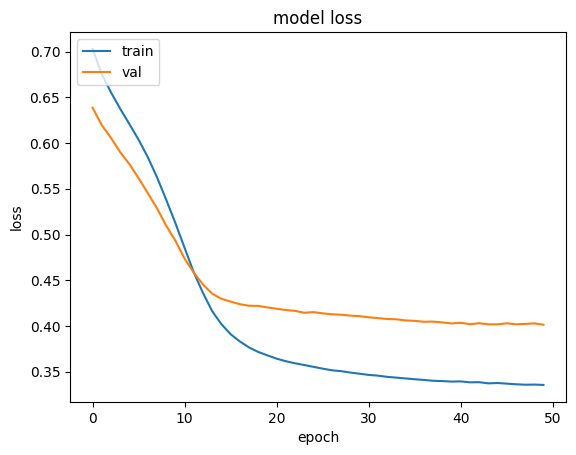

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Визуализация модели №2

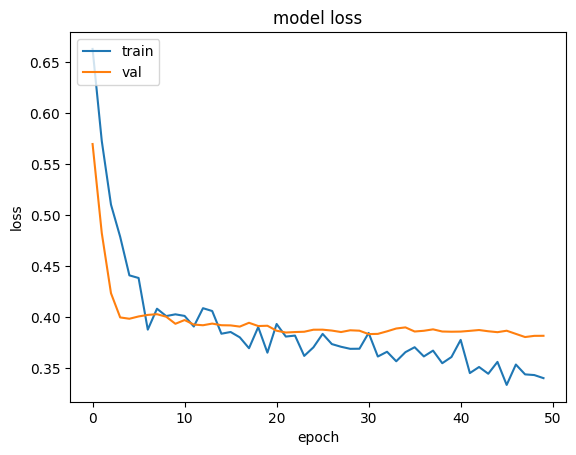

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Визуализация модели №3

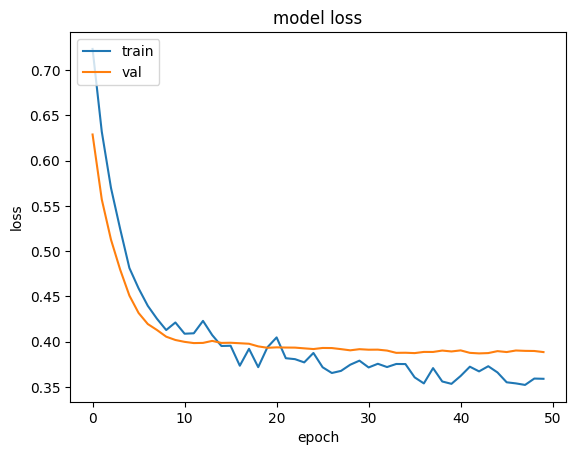

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
df = pd.read_csv('/kaggle/input/titanic-df/Titanic.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Survived'].value_counts

In [ ]:
df

,A,B,C
0,1,10,5
1,2,12,6
2,3,14,7
3,4,13,8
4,5,15,9
5,100,200,300


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Find Outliers in DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [10, 12, 14, 13, 15, 200],
    'C': [5, 6, 7, 8, 9, 300]
}

df = pd.DataFrame(data)

# Function to find outliers
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get outliers
outliers = find_outliers(df)
print(outliers)

{'A':      A    B    C
5  100  200  300, 'B':      A    B    C
5  100  200  300, 'C':      A    B    C
5  100  200  300}
